# Data Loading

*   https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks
*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
* https://archive.ics.uci.edu/dataset/52/ionosphere



In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

## Connectionist Bench (Sonar, Mines vs. Rocks)


*   Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

*   The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).



In [ ]:
def fetch_sonar():
  # fetch dataset
  connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)

  # data (as pandas dataframes)
  X = connectionist_bench_sonar_mines_vs_rocks.data.features
  y = connectionist_bench_sonar_mines_vs_rocks.data.targets

  missing_values_features = X.isnull().sum().sum()  # Checking is null with every feature, then sum
  missing_values_targets = y.isnull().sum().sum()

  if missing_values_features == 0 and missing_values_targets == 0:
      print("No missing data in features and targets.")
  else:
      print(f"Missing data detected! Features missing values: {missing_values_features}, Targets missing values: {missing_values_targets}")

  #Mapping target classes R - rock to 0, M - mine to 1
  y['class'] = y['class'].replace({'R': 0, 'M': 1})
  target_counts = y['class'].value_counts()


  plt.figure(figsize=(8, 6))
  target_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['Rock (0)', 'Mine (1)'], colors=['blue', 'orange'])
  plt.title('Distribution of Target Classes in Sonar Dataset')
  plt.ylabel('')  # Hide the y-label
  plt.show()

  print("Tail features sonar data", X.tail)
  print("Tail targets sonar data", y.tail)

  return X, y

No missing data in features and targets.


<ipython-input-60-03ef8c751f9a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace({'R': 0, 'M': 1})


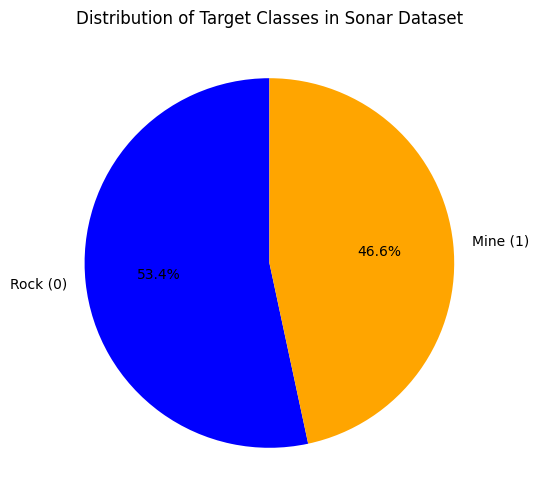

Tail features sonar data <bound method NDFrame.tail of      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0        0.0200      0.0371      0.0428      0.0207      0.0954      0.0986   
1        0.0453      0.0523      0.0843      0.0689      0.1183      0.2583   
2        0.0262      0.0582      0.1099      0.1083      0.0974      0.2280   
3        0.0100      0.0171      0.0623      0.0205      0.0205      0.0368   
4        0.0762      0.0666      0.0481      0.0394      0.0590      0.0649   
..          ...         ...         ...         ...         ...         ...   
203      0.0187      0.0346      0.0168      0.0177      0.0393      0.1630   
204      0.0323      0.0101      0.0298      0.0564      0.0760      0.0958   
205      0.0522      0.0437      0.0180      0.0292      0.0351      0.1171   
206      0.0303      0.0353      0.0490      0.0608      0.0167      0.1354   
207      0.0260      0.0363      0.0136      0.0272      0.0214      0.0338 

In [ ]:
sonar_X, sonar_y = fetch_sonar()

##  UCI ML Breast Cancer Wisconsin (Diagnostic) dataset

In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
data = load_breast_cancer()
print(data['data'])
print(data.feature_names)

df_describe = pd.DataFrame(data['data'])
print(df_describe.describe())
print("Target data is already prepared for binary classification. Example: ", data.target[[10, 50, 60]])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
               0           1         

<Axes: >

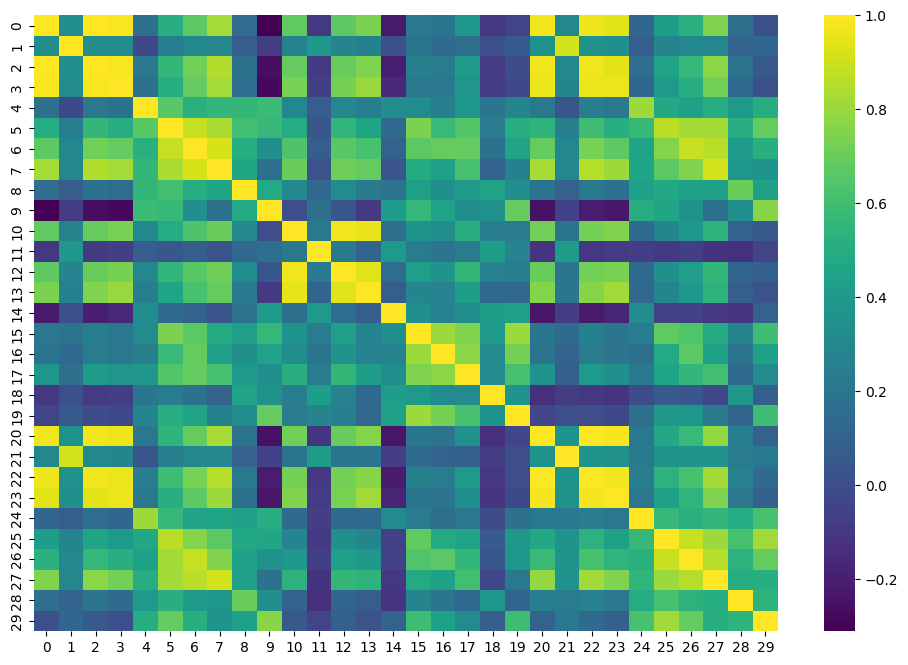

In [7]:
import seaborn as sns
plt.figure(figsize=(12, 8))
correlation_matrix = df_describe.corr()
sns.heatmap(df_describe.corr(), cmap='viridis')

In [17]:
threshold = 0.9
highly_correlated = np.where(np.abs(correlation_matrix) > threshold)
correlated_features = set()

# Iterate over the indices of highly correlated features
for x, y in zip(*highly_correlated):
    if x != y and x < y:  # Ensure not to include self-correlation and only include one pair of each feature
        feature1 = correlation_matrix.index[x]
        feature2 = correlation_matrix.columns[y]
        correlation = correlation_matrix.iloc[x, y]
        correlated_features.add((feature1, feature2, correlation))
print("Highly Correlated Features:")
for feature1, feature2, correlation in correlated_features:
    print(f"{feature1} - {feature2}: {correlation:.2f}")

features_to_remove = set()
for feature1, feature2, _ in correlated_features:
    features_to_remove.add(feature2)

# Remove highly correlated features from the dataset
data_filtered = df_describe.drop(columns=features_to_remove)

print("\nRemoved Features:")
print(features_to_remove)
print("Shape of the filtered dataset:", data_filtered.shape)



Highly Correlated Features:
0 - 3: 0.99
0 - 23: 0.94
0 - 22: 0.97
0 - 2: 1.00
10 - 13: 0.95
10 - 12: 0.97
2 - 23: 0.94
22 - 23: 0.98
2 - 20: 0.97
7 - 27: 0.91
12 - 13: 0.94
2 - 22: 0.97
20 - 23: 0.98
2 - 3: 0.99
3 - 20: 0.96
0 - 20: 0.97
1 - 21: 0.91
20 - 22: 0.99
3 - 23: 0.96
6 - 7: 0.92
3 - 22: 0.96

Removed Features:
{2, 3, 7, 12, 13, 20, 21, 22, 23, 27}
Shape of the filtered dataset: (569, 20)


In [25]:
X_breast = data_filtered
Y_breast = data.target
print(type(X_breast), type(Y_breast))
X_breast, Y_breast

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


(        0      1        4        5        6       8        9       10      11  \
 0    17.99  10.38  0.11840  0.27760  0.30010  0.2419  0.07871  1.0950  0.9053   
 1    20.57  17.77  0.08474  0.07864  0.08690  0.1812  0.05667  0.5435  0.7339   
 2    19.69  21.25  0.10960  0.15990  0.19740  0.2069  0.05999  0.7456  0.7869   
 3    11.42  20.38  0.14250  0.28390  0.24140  0.2597  0.09744  0.4956  1.1560   
 4    20.29  14.34  0.10030  0.13280  0.19800  0.1809  0.05883  0.7572  0.7813   
 ..     ...    ...      ...      ...      ...     ...      ...     ...     ...   
 564  21.56  22.39  0.11100  0.11590  0.24390  0.1726  0.05623  1.1760  1.2560   
 565  20.13  28.25  0.09780  0.10340  0.14400  0.1752  0.05533  0.7655  2.4630   
 566  16.60  28.08  0.08455  0.10230  0.09251  0.1590  0.05648  0.4564  1.0750   
 567  20.60  29.33  0.11780  0.27700  0.35140  0.2397  0.07016  0.7260  1.5950   
 568   7.76  24.54  0.05263  0.04362  0.00000  0.1587  0.05884  0.3857  1.4280   
 
            14

# Ionosphere


*   This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.
*   The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere.  "Bad" returns are those that do not; their signals pass through the ionosphere.



In [21]:
def fetch_ionsphere():
  # fetch dataset
  ionosphere = fetch_ucirepo(id=52)

  # data (as pandas dataframes)
  X = ionosphere.data.features
  y = ionosphere.data.targets

  missing_values_features = X.isnull().sum().sum()  # Checking is null with every feature, then sum
  missing_values_targets = y.isnull().sum().sum()

  if missing_values_features == 0 and missing_values_targets == 0:
      print("No missing data in features and targets.")
  else:
      print(f"Missing data detected! Features missing values: {missing_values_features}, Targets missing values: {missing_values_targets}")

  #Mapping target classes b - bad to 0, g - good to 1
  y['Class'] = y['Class'].replace({'b': 0, 'g': 1})

  target_counts = y.value_counts()
  plt.figure(figsize=(8, 6))
  target_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['Bad (0)', 'Good (1)'], colors=['red', 'green'])
  plt.title('Distribution of Target Classes in Ionosphere Dataset')
  plt.ylabel('')
  plt.show()

  print("Tail features ionsphere data", X.tail)
  print("Tail targets ionsphere data", y.tail)

  return X, y


No missing data in features and targets.


<ipython-input-21-f42a10e74cdc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].replace({'b': 0, 'g': 1})


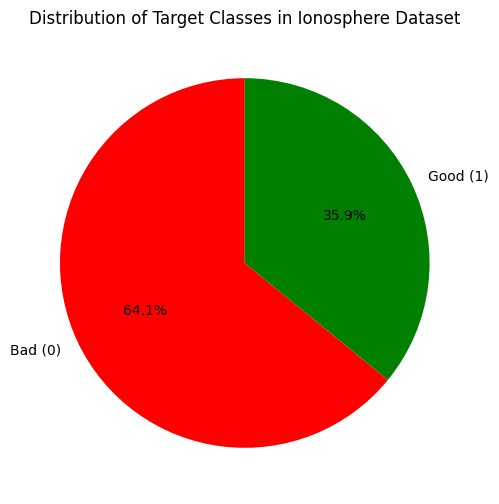

Tail features ionsphere data <bound method NDFrame.tail of      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             1           0     0.99539    -0.05889     0.85243     0.02306   
1             1           0     1.00000    -0.18829     0.93035    -0.36156   
2             1           0     1.00000    -0.03365     1.00000     0.00485   
3             1           0     1.00000    -0.45161     1.00000     1.00000   
4             1           0     1.00000    -0.02401     0.94140     0.06531   
..          ...         ...         ...         ...         ...         ...   
346           1           0     0.83508     0.08298     0.73739    -0.14706   
347           1           0     0.95113     0.00419     0.95183    -0.02723   
348           1           0     0.94701    -0.00034     0.93207    -0.03227   
349           1           0     0.90608    -0.01657     0.98122    -0.01989   
350           1           0     0.84710     0.13533     0.73638    -0.06

In [22]:
ionsphere_X, ionsphere_y = fetch_ionsphere()

In [24]:
print(type(ionsphere_X), type(ionsphere_y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
